#Wine Quality

**Data Set Information:**
TBC

**Attribute Information:**

**-type:** red wine or white wine, nominal qunatity; <br>
**-fixed acidity:** grams of tataric acid per 100ml, ratio qunatity; <br>
**-volatile acidity:** grams of acetic acid per liter of wine, ratio qunatity; <br>
**-citric acid:** grams per liter, ratio qunatity; <br>
**-residual sugar:** grams per liter, ratio qunatity; <br>
**-chlorides:** grams of sodium chloride per liter, ratio qunatity; <br>
**-free sulfur dioxide:** milligrams per liter, ratio qunatity; <br>
**-total sulfur dioxide:** milligrams per liter, ratio qunatity; <br>
**-density:** grams per cubic centimeter, ratio qunatity; <br>
**-pH:** ratio qunatity; <br>
**-sulphates:** grams of potassium sulfate per liter, ratio qunatity; <br>
**-alcohol:** vol.%, ratio qunatity; <br>
**-quality:** Output variable, score between 0 and 10, subjective(?), ordinal qunantity 

Preprocessing:
Combine two .csv files (one for red wine, one for white wine) into one file with the new attribute "type".





# General Data Preparation
### Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_selection import SelectPercentile, chi2, SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection

### Get the Data

In [94]:
data = pd.read_csv('wineQualityBothTypes.csv', delimiter = ';')

In [95]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Basic Data Information 

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [97]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [98]:
data.describe(include = 'object')

,type
count,6497
unique,2
top,white
freq,4898


Check missing values

In [99]:
print(data.isnull().sum(axis=0))

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Exploratory Data Analysis

### Quality

In [107]:
#split data into red and white again
dataRed = data.loc[data['type'] == 'red']
dataWhite = data.loc[data['type'] == 'white']

#### Histograms

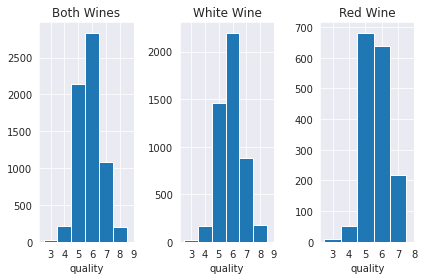

In [131]:

fig = plt.figure()
plt.subplot(131)
sns.set_style('darkgrid')
bins = np.arange(data['quality'].min(), data['quality'].max()+1)
plt.hist(data['quality'], bins=bins, align='left')
plt.title("Both Wines")
plt.xticks(bins)
plt.xlabel('quality')

plt.subplot(132)
sns.set_style('darkgrid')
bins = np.arange(dataWhite['quality'].min(), dataWhite['quality'].max()+1)
plt.hist(dataWhite['quality'], bins=bins, align='left')
plt.title("White Wine")
plt.xticks(bins)
plt.xlabel('quality')

plt.subplot(133)
sns.set_style('darkgrid')
bins = np.arange(dataRed['quality'].min(), dataRed['quality'].max()+1)
plt.hist(dataRed['quality'], bins=bins, align='left')
plt.title("Red Wine")
plt.xticks(bins)
plt.xlabel('quality')

#plt.axis('equal')
plt.tight_layout()
plt.savefig("classDistributionWine.png")
plt.show()

#### Split into white wine and red wine
White wine:

Text(0.5, 0, 'quality')

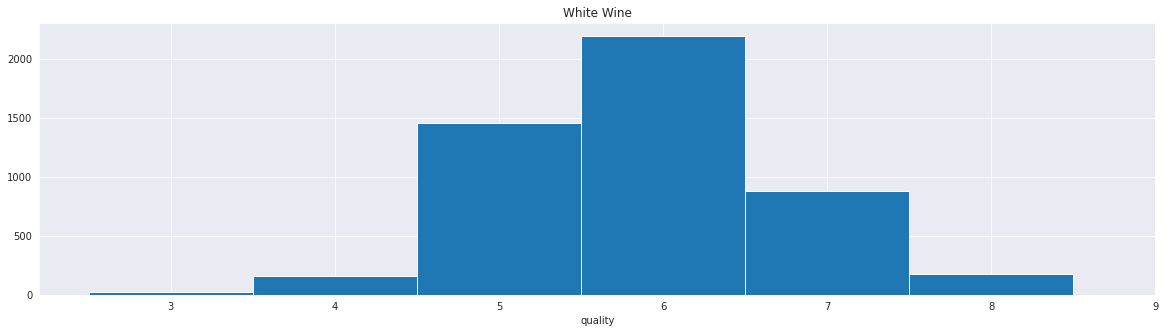

In [105]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
dataWhite = data.loc[data['type'] == 'white']
bins = np.arange(dataWhite['quality'].min(), dataWhite['quality'].max()+1)
plt.hist(dataWhite['quality'], bins=bins, align='left')
plt.title("White Wine")
plt.xticks(bins)
plt.xlabel('quality')

### Red wine:

Text(0.5, 0, 'quality')

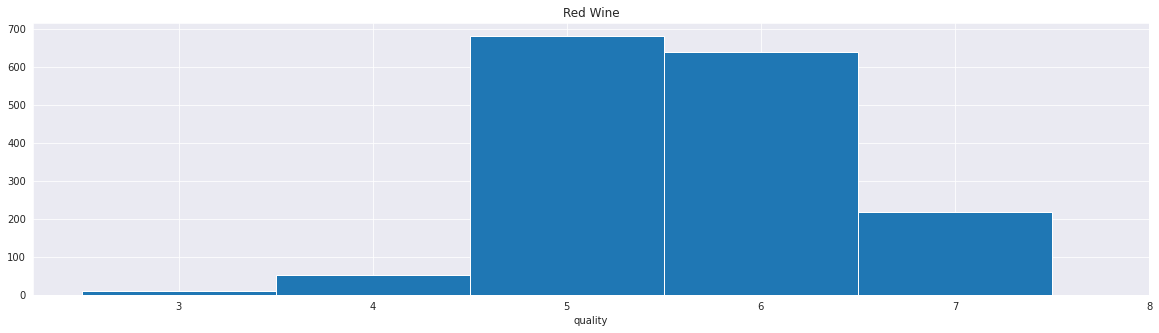

In [106]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
bins = np.arange(dataRed['quality'].min(), dataRed['quality'].max()+1)
plt.hist(dataRed['quality'], bins=bins, align='left')
plt.title("Red Wine")
plt.xticks(bins)
plt.xlabel('quality')

### Fixed Acidity vs. Quality 

#### Both types

In [ ]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['fixed acidity'], data['quality'])
plt.title("Both Types")
plt.xlabel('fixed acidity [g(tataric acid)/100ml]')
plt.ylabel('quality')
plt.show()

#### Red Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['fixed acidity'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('fixed acidity [g(tataric acid)/100ml]')
plt.ylabel('quality')
plt.show()

#### White Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['fixed acidity'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('fixed acidity [g(tataric acid)/100ml]')
plt.ylabel('quality')
plt.show()

### Volatile Acidity vs. Quality 

#### Both types

In [ ]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['volatile acidity'], data['quality'])
plt.title("Both Types")
plt.xlabel('volatile acidity [g(acetic acid)/100ml]')
plt.ylabel('quality')
plt.show()

#### Red Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['volatile acidity'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('volatile acidity [g(acetic acid)/100ml]')
plt.ylabel('quality')
plt.show()

#### White Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['volatile acidity'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('volatile acidity [g(acetic acid)/100ml]')
plt.ylabel('quality')
plt.show()

### Citric Acid vs. Quality 

#### Both types

In [ ]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['citric acid'], data['quality'])
plt.title("Both Types")
plt.xlabel('citric acid [g/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['citric acid'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('citric acid [g/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['citric acid'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('citric acid [g/l]')
plt.ylabel('quality')
plt.show()

### Residual Sugar vs. Quality 

#### Both types

In [ ]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['residual sugar'], data['quality'])
plt.title("Both Types")
plt.xlabel('residual sugar [g/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['residual sugar'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('residual sugar [g/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['residual sugar'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('residual sugar [g/l]')
plt.ylabel('quality')
plt.show()

### Chlorides vs. Quality 

#### Both types

In [ ]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['chlorides'], data['quality'])
plt.title("Both Types")
plt.xlabel('chlorides [g(sodium chloride)/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['chlorides'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('chlorides [g(sodium chloride)/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['chlorides'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('chlorides [g(sodium chloride)/l]')
plt.ylabel('quality')
plt.show()

### Free Sulfur Dioxide vs. Quality 

#### Both types

In [ ]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['free sulfur dioxide'], data['quality'])
plt.title("Both Types")
plt.xlabel('free sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['free sulfur dioxide'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('free sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['free sulfur dioxide'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('free sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

### Total Sulfur Dioxide vs. Quality 

#### Both types

In [ ]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['total sulfur dioxide'], data['quality'])
plt.title("Both Types")
plt.xlabel('total sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['total sulfur dioxide'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('total sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['total sulfur dioxide'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('total sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

### Density vs. Quality 

#### Both types

In [ ]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['density'], data['quality'])
plt.title("Both Types")
plt.xlabel('density [g/cm³]')
plt.ylabel('quality')
plt.show()

#### Red Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['density'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('density [g/cm³]')
plt.ylabel('quality')
plt.show()

#### White Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['density'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('density [g/cm³]')
plt.ylabel('quality')
plt.show()

### pH value vs. Quality 

#### Both types

In [ ]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['pH'], data['quality'])
plt.title("Both Types")
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

#### Red Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['pH'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

#### White Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['pH'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

### Sulphates vs. Quality 

#### Both types

In [ ]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['sulphates'], data['quality'])
plt.title("Both Types")
plt.xlabel('sulphates [g(potassium sulfate)/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['sulphates'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('sulphates [g(potassium sulfate)/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['sulphates'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('sulphates [g(potassium sulfate)/l]')
plt.ylabel('quality')
plt.show()

### Alcohol Content vs. Quality 

#### Both types

In [ ]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['alcohol'], data['quality'])
plt.title("Both Types")
plt.xlabel('alcohol [vol%]')
plt.ylabel('quality')
plt.show()

#### Red Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['alcohol'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('alcohol [vol%]')
plt.ylabel('quality')
plt.show()

#### White Wine

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['alcohol'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('alcohol [vol%]')
plt.ylabel('quality')
plt.show()

# 2) Preprocessing

In [10]:
#first convert the strings 'white' and 'red' to 0 and 1 respectively
mapping = {'white': 0, 'red': 1}
data = data.replace({'type': mapping})

#Then split data into red and white again with that mapping
dataWhite = dataWhite.replace({'type': mapping})
dataRed = dataRed.replace({'type': mapping})

#split the data in attributes and class
X = data.drop('quality', axis=1)
y = data['quality']

#split the data in attributes and class
XWhite = dataWhite.drop('quality', axis=1)
yWhite = dataWhite['quality']

XRed = dataRed.drop('quality', axis=1)
yRed = dataRed['quality']


##  2.1) Feature Selection 

**Choose one of the methods:**
1. SelectPercentile (chi2)
2. SelectFromModel (LinearSVC)
3. SelectFromModel (LogisticRegression)
3. SelectFromModel (ExtraTreesClassifier)

## 2.2) Data Pre-processing

**Choose one of the methods:**
1. Standardization (StandardScaler)
2. Standardization (RobustScaler)
3. MinMaxScaler
4. Normalization

## 2.3)Outliers Detection using mathematical function Z-Score


### All three features included in the following function:

In [11]:
def featureSelection(XCurr, yCurr, featureselection_method, preprocessing_method):
    if featureselection_method == 1:
        selection = SelectPercentile(chi2, percentile=5)
    elif featureselection_method == 2:
        clf = LinearSVC()
        #clf = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
        selection = SelectFromModel(clf, prefit=False)
    elif featureselection_method == 3:
        clf = LogisticRegression()
        #clf = LogisticRegression(C=0.2, penalty="l2", dual=False, max_iter=200).fit(X, y)
        selection = SelectFromModel(clf, prefit=False)
    elif featureselection_method == 4:
        clf = ExtraTreesClassifier(n_estimators=50).fit(XCurr, yCurr)
        selection = SelectFromModel(clf, prefit=False)      

    clf.feature_importances_ 
    X_transformed = selection.fit_transform(XCurr, yCurr)
    columns = np.asarray(XCurr.columns.values)
    support = np.asarray(selection.get_support())
    columns_with_support = columns[support]
    print("X_transformed.shape",X_transformed.shape)
    print("selected attributes: ", columns_with_support)
    
    #Data Pre-processing:
    if preprocessing_method == 1:
        scaler = StandardScaler()
        scaler = scaler.fit(X_transformed)
        X_scaled = scaler.transform(X_transformed)
    elif preprocessing_method == 2:
        scaler = RobustScaler()
        scaler = scaler.fit(X_transformed)
        X_scaled = scaler.transform(X_transformed)
    elif preprocessing_method == 3:
        scaler = preprocessing.MinMaxScaler()
        scaler = scaler.fit(X_transformed)
        X_scaled = scaler.transform(X_transformed)
    elif preprocessing_method == 4:
        scaler = preprocessing.Normalizer()
        scaler = scaler.fit(X_transformed)
        X_scaled = scaler.transform(X_transformed)
    print("X_scaled = ",X_scaled)
    
    
    #Outlier Detection:
    z = np.abs(stats.zscore(X_scaled))
    threshold = 20
    outliers_rows = np.where(z > threshold)
    print("\n z > threshold = ", np.where(z > threshold))
    # The first array contains the list of row numbers and second array respective column numbers
    print("\n number of outliers = ",len(set(outliers_rows[0])))
    
    #Remove Ouliers
    #X_prepared = X_scaled[(np.abs(stats.zscore(X_scaled)) < threshold).all(axis=1)]
    #X_prepared.shape
    #y = y.to_numpy()
    
    #X_train, X_test, y_train, y_test = train_test_split(X_scaled, yCurr, test_size=0.30)
    #return(X_train, X_test, y_train, y_test)
    return(X_scaled, yCurr)

In [12]:
featureselection_method = 4
preprocessing_method = 1

In [13]:
print('\n-------------------both types ------------------\n')
X, y = featureSelection(X, y, featureselection_method, preprocessing_method)

print('\n--------------------red wine -------------------\n')
XRed, yRed = featureSelection(XRed, yRed, featureselection_method, preprocessing_method)

print('\n-------------------white wine------------------\n')
XWhite, yWhite = featureSelection(XWhite, yWhite, featureselection_method, preprocessing_method)


-------------------both types ------------------

X_transformed.shape (6497, 6)
selected attributes:  ['volatile acidity' 'free sulfur dioxide' 'total sulfur dioxide' 'density'
 'sulphates' 'alcohol']
X_scaled =  [[ 2.18883292 -1.10013986 -1.44635852  1.03499282  0.19309677 -0.91546416]
 [ 3.28223494 -0.31132009 -0.86246863  0.70148631  0.99957862 -0.58006813]
 [ 2.55330026 -0.87476278 -1.09248586  0.76818761  0.79795816 -0.58006813]
 ...
 [-0.6054167  -0.02959874 -0.08394876 -0.71925142 -0.47897144 -0.91546416]
 [-0.30169391 -0.59304143 -0.10164239 -2.00325148 -1.016626    1.9354021 ]
 [-0.78765037 -0.48035289 -0.31396599 -1.7631268  -1.41986693  1.09691202]]

 z > threshold =  (array([], dtype=int64), array([], dtype=int64))

 number of outliers =  0

--------------------red wine -------------------

X_transformed.shape (1599, 6)
selected attributes:  ['volatile acidity' 'citric acid' 'total sulfur dioxide' 'density'
 'sulphates' 'alcohol']
X_scaled =  [[ 0.96187667 -1.39147228 -0.3

In [14]:
NN = 1

d = {}

d["Logistic Regression"] = LogisticRegression(max_iter=200)
d["Gaussian Naive Bayes"] = GaussianNB()

d["KNearest Neighbors ("+ str(NN) + ")"] = KNeighborsClassifier(n_neighbors=NN)

d["SVM rbf"] = SVC()
d["SGD Classifier"] = SGDClassifier()

d["Decision Tree"] = DecisionTreeClassifier()

d["Random Forest"] = RandomForestClassifier()

d["Multi-layer Perceptron Classifier"] = MLPClassifier(max_iter=1000)

### General Remark:
Depending on the split of test and training set sometimes the ranking of the accuracy of the 8 claassifiers changes a bit. therefore I decided to run the classifiers with standard setting N times with different test/training set splits. 
Then from the average accuracy I chose the top three. 
For those three i then do a hyperparameter optimization.
This way it is easier to pick three classifiers for the report.

## 3.1) Comparison of Classifiers with standard settings

In [24]:
def compareClassifiers(X, y, d):
    N = 15
    
    scoreList = [0]*len(d.items())
    highScoreList = [0]*len(d.items())
    nameList = ['a']*len(d.items())
    timeList = [0]*len(d.items())
    
    for i in range(0,N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
        
        counter = 0
        for name, clf in d.items():
            start = time.time()
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            end = time.time()
            timeList[counter] = timeList[counter] + (end - start)
            score = accuracy_score(y_test, y_pred)
            scoreList[counter] = scoreList[counter] + score
            if score > highScoreList[counter]:
                highScoreList[counter] = score
            nameList[counter] = name #overwrites n times but whatever 
            #print("i = ", i, " counter = ", counter, "score = ", score, "name = ", name, "time = ", end - start)
            counter += 1
 
    scoreList[:] = [x / N for x in scoreList]
    timeList[:] = [x / N for x in timeList] 
    
    ranking = sorted(zip(scoreList,nameList,highScoreList,timeList))[::-1]
    print(ranking)
    print("\nClassifiers from best to worst:")
    for i in range(0, len(ranking)):
        print(i+1, ') {:34} averageScore: {:.5} bestScore: {:.5} averageTime: {:.5} s'.format(ranking[i][1], str(ranking[i][0]), str(ranking[i][2]), str(ranking[i][3])))
        #print(ranking[i][1], ranking[i][0],ranking[i][2], ranking[i][3])
    return(y_test, y_train, X_test, X_train, ranking)

#old version:
y_test, y_train, X_test, X_train = train_test_split(X, y, test_size=0.20)
scoreList = []
nameList = []
counter = 0

for name, clf in d.items():
    start = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scoreList.append(accuracy_score(y_test, y_pred))
    nameList.append(name)

    end = time.time()
    print("\n--------------",name,"---------------\n")
    print("- Accuracy: %f" % score, "- Time: %0.2f" % (end - start), "seconds")
    print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (X_test.shape[0], (y_test != y_pred).sum()))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



print("###############")
ranking = sorted(zip(scoreList,nameList))[::-1]
#print(sorted(zip(scoreList,nameList)))
print("\nClassifiers from best to worst:")
for i in range(0, len(ranking)):
    print(i+1, ') {0:35} score: {1}'.format(ranking[i][1], ranking[i][0]))

#return(y_test, y_train, X_test, X_train, ranking)

### 3.1.1) Both Wines

In [15]:
y_test, y_train, X_test, X_train, rankingBoth = compareClassifiers(X, y, d)

[(0.6632871794871795, 'Random Forest', 0.683076923076923, 0.635870385169983), (0.6041538461538464, 'KNearest Neighbors (1)', 0.6287179487179487, 0.06420836687088012), (0.5833076923076922, 'Decision Tree', 0.6092307692307692, 0.01921846866607666), (0.5589743589743589, 'Multi-layer Perceptron Classifier', 0.5851282051282052, 8.664347414970399), (0.5542153846153844, 'SVM rbf', 0.5733333333333334, 1.0227362895011902), (0.5394769230769233, 'Logistic Regression', 0.5641025641025641, 0.3410611534118652), (0.5024564102564102, 'SGD Classifier', 0.5425641025641026, 0.05513713598251343), (0.48352307692307706, 'Gaussian Naive Bayes', 0.5102564102564102, 0.002738757133483887)]

Classifiers from best to worst:
1 ) Random Forest                      averageScore: 0.663 bestScore: 0.683 averageTime: 0.635 s
2 ) KNearest Neighbors (1)             averageScore: 0.604 bestScore: 0.628 averageTime: 0.064 s
3 ) Decision Tree                      averageScore: 0.583 bestScore: 0.609 averageTime: 0.019 s
4 )

### 3.1.2) Red Wine only

In [16]:
yRed_test, yRed_train, XRed_test, XRed_train, rankingRed = compareClassifiers(XRed, yRed, d)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[(0.6730624999999999, 'Random Forest', 0.725, 0.25492878913879397), (0.615541666666667, 'KNearest Neighbors (1)', 0.675, 0.022631077766418456), (0.6066041666666667, 'SVM rbf', 0.6479166666666667, 0.09084071874618531), (0.6003125, 'Decision Tree', 0.6583333333333333, 0.004735956192016602), (0.5957083333333333, 'Multi-layer Perceptron Classifier', 0.6375, 4.289286739826203), (0.5891666666666666, 'Logistic Regression', 0.6375, 0.06052438497543335), (0.5816875000000001, 'Gaussian Naive Bayes', 0.6229166666666667, 0.0020508909225463866), (0.53, 'SGD Classifier', 0.5875, 0.01654426097869873)]

Classifiers from best to worst:
1 ) Random Forest                      averageScore: 0.673 bestScore: 0.725 averageTime: 0.254 s
2 ) KNearest Neighbors (1)             averageScore: 0.615 bestScore: 0.675 averageTime: 0.022 s
3 ) SVM rbf                            averageScore: 0.606 bestScore: 0.647 averageTime: 0.090 s
4 ) Decision Tree                      averageScore: 0.600 bestScore: 0.658 averag

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 3.1.3) White Wine only

In [17]:
yWhite_test, yWhite_train, XWhite_test, XWhite_train, rankingWhite = compareClassifiers(XWhite, yWhite, d)

[(0.6655782312925171, 'Random Forest', 0.6870748299319728, 0.4902655172348023), (0.6068911564625848, 'KNearest Neighbors (1)', 0.6312925170068027, 0.05667234897613525), (0.5845170068027211, 'Decision Tree', 0.6142857142857143, 0.018590912818908692), (0.5542108843537414, 'SVM rbf', 0.582312925170068, 0.6213712024688721), (0.5541224489795918, 'Multi-layer Perceptron Classifier', 0.5816326530612245, 8.58089510679245), (0.529047619047619, 'Logistic Regression', 0.5544217687074829, 0.29793455839157107), (0.4782244897959183, 'SGD Classifier', 0.5231292517006803, 0.050176618099212644), (0.4547755102040817, 'Gaussian Naive Bayes', 0.4850340136054422, 0.0025214886665344237)]

Classifiers from best to worst:
1 ) Random Forest                      averageScore: 0.665 bestScore: 0.687 averageTime: 0.490 s
2 ) KNearest Neighbors (1)             averageScore: 0.606 bestScore: 0.631 averageTime: 0.056 s
3 ) Decision Tree                      averageScore: 0.584 bestScore: 0.614 averageTime: 0.018 s
4

## 3.2) Hyperparameter Optimization

In [25]:
def hyperparameterOptimization(classifierName, param_grid, ranking, y_test, y_train, X_test, X_train):
    names = [j for i,j,k,l in ranking]
    index = names.index(classifierName)
    #print(ranking[index][1])

    start = time.time()
    clf_gridsearch = GridSearchCV(d.get(ranking[index][1]), param_grid, verbose=0)
    clf_gridsearch.fit(X_train, y_train)
    print(clf_gridsearch.best_params_)
    predictions = clf_gridsearch.predict(X_test)
    #print("test =",predictions)
    score_gridsearch = accuracy_score(y_test, predictions)
    end = time.time()
    print("GridSearchCV - Accuracy: %f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")
    print("Previous best Accuracy: ", ranking[index][2])
   
    print("\n\nAdditional statistics for prediction using best parameters:\n")
    print("Number of mislabeled points out of a total %d points : %d \n"% (X_test.shape[0], (y_test != predictions).sum()))
    print("Confusion Matrix:\n",confusion_matrix(y_test, predictions))
    print("Classsification Report: \n",classification_report(y_test, predictions))
    
    return()

In [26]:
def defaultPrediction(clf, y_test, y_train, X_test, X_train):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("accuracy with standard parameters:",accuracy_score(y_test, y_pred))    
    return()

### 3.2.1) RandomForest

#### Parameter Grid

In [30]:
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth': [10, 50, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2]}
#takes very long to calculate, if param grid is too large

#### 3.2.1.1) Both Wines

In [32]:
y_test, y_train, X_test, X_train, rankingBoth = compareClassifiers(X, y, d)
defaultPrediction(RandomForestClassifier(), y_test, y_train, X_test, X_train)
hyperparameterOptimization('Random Forest', param_grid, rankingBoth, y_test, y_train, X_test, X_train)

[(0.6611282051282051, 'Random Forest', 0.6676923076923077, 0.6193455219268799), (0.6033504273504274, 'KNearest Neighbors (1)', 0.6164102564102564, 0.06026503245035807), (0.5858461538461538, 'Decision Tree', 0.6087179487179487, 0.018300247192382813), (0.5549401709401709, 'Multi-layer Perceptron Classifier', 0.58, 8.645585664113362), (0.549162393162393, 'SVM rbf', 0.563076923076923, 0.9734248638153076), (0.5327863247863248, 'Logistic Regression', 0.5512820512820513, 0.3160899957021078), (0.491076923076923, 'SGD Classifier', 0.5328205128205128, 0.049910879135131835), (0.48140170940170945, 'Gaussian Naive Bayes', 0.49743589743589745, 0.002522182464599609)]

Classifiers from best to worst:
1 ) Random Forest                      averageScore: 0.661 bestScore: 0.667 averageTime: 0.619 s
2 ) KNearest Neighbors (1)             averageScore: 0.603 bestScore: 0.616 averageTime: 0.060 s
3 ) Decision Tree                      averageScore: 0.585 bestScore: 0.608 averageTime: 0.018 s
4 ) Multi-layer

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


()

#### 3.2.1.2) Red Wine

In [33]:
yRed_test, yRed_train, XRed_test, XRed_train, rankingRed = compareClassifiers(XRed, yRed, d)
defaultPrediction(RandomForestClassifier(), yRed_test, yRed_train, XRed_test, XRed_train)
hyperparameterOptimization('Random Forest', param_grid, rankingRed, yRed_test, yRed_train, XRed_test, XRed_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[(0.6790277777777778, 'Random Forest', 0.725, 0.2629309018452962), (0.6219444444444445, 'KNearest Neighbors (1)', 0.6520833333333333, 0.0239318052927653), (0.6175, 'SVM rbf', 0.64375, 0.08888880411783855), (0.6079166666666665, 'Decision Tree', 0.6416666666666667, 0.005825519561767578), (0.605138888888889, 'Multi-layer Perceptron Classifier', 0.6333333333333333, 4.589286470413208), (0.5977777777777779, 'Logistic Regression', 0.6208333333333333, 0.06626752217610678), (0.5845833333333332, 'Gaussian Naive Bayes', 0.63125, 0.002061939239501953), (0.5266666666666666, 'SGD Classifier', 0.5833333333333334, 0.017778396606445312)]

Classifiers from best to worst:
1 ) Random Forest                      averageScore: 0.679 bestScore: 0.725 averageTime: 0.262 s
2 ) KNearest Neighbors (1)             averageScore: 0.621 bestScore: 0.652 averageTime: 0.023 s
3 ) SVM rbf                            averageScore: 0.617 bestScore: 0.643 averageTime: 0.088 s
4 ) Decision Tree                      averageS

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


()

#### 3.2.1.3) White Wine

In [34]:
yWhite_test, yWhite_train, XWhite_test, XWhite_train, rankingWhite = compareClassifiers(XWhite, yWhite, d)
defaultPrediction(RandomForestClassifier(), yWhite_test, yWhite_train, XWhite_test, XWhite_train)
hyperparameterOptimization('Random Forest', param_grid, rankingWhite, yWhite_test, yWhite_train, XWhite_test, XWhite_train)

[(0.6614512471655328, 'Random Forest', 0.682312925170068, 0.5108603954315185), (0.6029478458049886, 'KNearest Neighbors (1)', 0.6217687074829932, 0.05718321800231933), (0.5849433106575964, 'Decision Tree', 0.6095238095238096, 0.018873055775960285), (0.5534240362811791, 'SVM rbf', 0.5741496598639456, 0.6323601086934407), (0.5505215419501134, 'Multi-layer Perceptron Classifier', 0.5619047619047619, 9.040035645167032), (0.5258503401360545, 'Logistic Regression', 0.5401360544217687, 0.2921169281005859), (0.4723356009070295, 'SGD Classifier', 0.4993197278911565, 0.05157993634541829), (0.45446712018140584, 'Gaussian Naive Bayes', 0.47551020408163264, 0.0025489012400309245)]

Classifiers from best to worst:
1 ) Random Forest                      averageScore: 0.661 bestScore: 0.682 averageTime: 0.510 s
2 ) KNearest Neighbors (1)             averageScore: 0.602 bestScore: 0.621 averageTime: 0.057 s
3 ) Decision Tree                      averageScore: 0.584 bestScore: 0.609 averageTime: 0.018 s

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


()

### 3.2.2) KNearest Neighbors

#### Parameter Grid

In [57]:
param_grid = param_grid = {'n_neighbors': [1,2,5,10,25,50,75,100,125],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

#### 3.2.2.1) Both Wines

In [58]:
defaultPrediction(KNeighborsClassifier(n_neighbors=NN), y_test, y_train, X_test, X_train)
hyperparameterOptimization('KNearest Neighbors (1)', param_grid, rankingBoth, y_test, y_train, X_test, X_train)

accuracy with standard parameters: 0.6128205128205129


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'n_neighbors': 75, 'p': 1, 'weights': 'distance'}
GridSearchCV - Accuracy: 0.665128 - Time: 7.76 seconds
Previous best Accuracy:  0.6287179487179487


Additional statistics for prediction using best parameters:

Number of mislabeled points out of a total 1950 points : 653 

Confusion Matrix:
 [[  0   0   6   1   0   0   0]
 [  0   5  38  22   0   0   0]
 [  0   0 438 200   3   0   0]
 [  0   0 139 676  44   0   0]
 [  0   0   6 165 155   0   0]
 [  0   0   1  15  11  23   0]
 [  0   0   0   2   0   0   0]]
Classsification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.08      0.14        65
           5       0.70      0.68      0.69       641
           6       0.63      0.79      0.70       859
           7       0.73      0.48      0.58       326
           8       1.00      0.46      0.63        50
           9       0.00      0.00      0.00         2

    accuracy               

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


()

#### 3.2.2.2) Red Wine

In [59]:
defaultPrediction(KNeighborsClassifier(n_neighbors=NN), yRed_test, yRed_train, XRed_test, XRed_train)
hyperparameterOptimization('KNearest Neighbors (1)', param_grid, rankingRed, yRed_test, yRed_train, XRed_test, XRed_train)

accuracy with standard parameters: 0.5833333333333334
{'n_neighbors': 100, 'p': 1, 'weights': 'distance'}
GridSearchCV - Accuracy: 0.672917 - Time: 2.03 seconds
Previous best Accuracy:  0.675


Additional statistics for prediction using best parameters:

Number of mislabeled points out of a total 480 points : 157 

Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   0  10   2   0   0]
 [  0   0 157  39   0   0]
 [  0   0  52 142   4   0]
 [  0   0   4  40  23   0]
 [  0   0   0   3   2   1]]
Classsification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.70      0.80      0.75       196
           6       0.63      0.72      0.67       198
           7       0.79      0.34      0.48        67
           8       1.00      0.17      0.29         6

    accuracy                           0.67       480
   macro avg       0.52      0.34      0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


()

#### 3.2.2.3) White Wine

In [60]:
defaultPrediction(KNeighborsClassifier(n_neighbors=NN), yWhite_test, yWhite_train, XWhite_test, XWhite_train)
hyperparameterOptimization('KNearest Neighbors (1)', param_grid, rankingWhite, yWhite_test, yWhite_train, XWhite_test, XWhite_train)

accuracy with standard parameters: 0.6129251700680272


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'n_neighbors': 50, 'p': 1, 'weights': 'distance'}
GridSearchCV - Accuracy: 0.646939 - Time: 7.20 seconds
Previous best Accuracy:  0.6312925170068027


Additional statistics for prediction using best parameters:

Number of mislabeled points out of a total 1470 points : 519 

Confusion Matrix:
 [[  0   0   4   6   0   0   0]
 [  0   7  22  16   0   0   0]
 [  0   0 291 154   4   0   0]
 [  0   0  85 517  46   0   0]
 [  0   0   4 144 124   0   0]
 [  0   0   0  21  11  12   0]
 [  0   0   0   2   0   0   0]]
Classsification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       1.00      0.16      0.27        45
           5       0.72      0.65      0.68       449
           6       0.60      0.80      0.69       648
           7       0.67      0.46      0.54       272
           8       1.00      0.27      0.43        44
           9       0.00      0.00      0.00         2

    accuracy               

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


()

### 3.2.3) Decision Tree

#### Parameter Grid

In [42]:
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth': [10, 50, 100, None],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'splitter' : ['best', 'random'],
              'min_samples_leaf': [1, 2, 4]}

#### 3.2.3.1) Both Wines

In [43]:
y_test, y_train, X_test, X_train, rankingBoth = compareClassifiers(X, y, d)
defaultPrediction(DecisionTreeClassifier(), y_test, y_train, X_test, X_train)
hyperparameterOptimization('Decision Tree', param_grid, rankingBoth, y_test, y_train, X_test, X_train)

[(0.6594871794871795, 'Random Forest', 0.6753846153846154, 0.6388326327006022), (0.599931623931624, 'KNearest Neighbors (1)', 0.6107692307692307, 0.062436215082804364), (0.5875897435897437, 'Decision Tree', 0.6087179487179487, 0.018895578384399415), (0.5561367521367521, 'Multi-layer Perceptron Classifier', 0.5738461538461539, 8.919428253173828), (0.5523760683760683, 'SVM rbf', 0.5753846153846154, 1.000402530034383), (0.5395897435897437, 'Logistic Regression', 0.5502564102564103, 0.31969141960144043), (0.49750427350427345, 'SGD Classifier', 0.5235897435897436, 0.05209256807963054), (0.48242735042735047, 'Gaussian Naive Bayes', 0.49948717948717947, 0.0026713848114013673)]

Classifiers from best to worst:
1 ) Random Forest                      averageScore: 0.659 bestScore: 0.675 averageTime: 0.638 s
2 ) KNearest Neighbors (1)             averageScore: 0.599 bestScore: 0.610 averageTime: 0.062 s
3 ) Decision Tree                      averageScore: 0.587 bestScore: 0.608 averageTime: 0.018

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'splitter': 'best'}
GridSearchCV - Accuracy: 0.578974 - Time: 6.93 seconds
Previous best Accuracy:  0.6087179487179487


Additional statistics for prediction using best parameters:

Number of mislabeled points out of a total 1950 points : 821 

Confusion Matrix:
 [[  0   1   6   0   1   0   0]
 [  1  11  30  28   7   0   0]
 [  4  17 394 152  44  10   0]
 [  5  13 183 520 118  20   0]
 [  0   5  23 109 178  13   1]
 [  0   0   0  22   7  26   0]
 [  0   0   0   1   0   0   0]]
Classsification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.23      0.14      0.18        77
           5       0.62      0.63      0.63       621
           6       0.62      0.61      0.62       859
           7       0.50      0.54      0.52       329
           8       0.38      0.47      0.42        55
           9       0.00    

()

#### 3.2.3.2) Red Wine

In [46]:
yRed_test, yRed_train, XRed_test, XRed_train, rankingRed = compareClassifiers(XRed, yRed, d)
defaultPrediction(DecisionTreeClassifier(), yRed_test, yRed_train, XRed_test, XRed_train)
hyperparameterOptimization('Decision Tree', param_grid, rankingRed, yRed_test, yRed_train, XRed_test, XRed_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[(0.6734722222222221, 'Random Forest', 0.6958333333333333, 0.2597455660502116), (0.6187500000000001, 'KNearest Neighbors (1)', 0.6458333333333334, 0.023427947362263998), (0.6091666666666666, 'SVM rbf', 0.6375, 0.08624003728230795), (0.6024999999999999, 'Multi-layer Perceptron Classifier', 0.6333333333333333, 4.6421897411346436), (0.5898611111111111, 'Logistic Regression', 0.6166666666666667, 0.06326686541239421), (0.58875, 'Decision Tree', 0.6270833333333333, 0.005301268895467123), (0.5681944444444443, 'Gaussian Naive Bayes', 0.6208333333333333, 0.0019516785939534505), (0.5206944444444443, 'SGD Classifier', 0.59375, 0.016022364298502605)]

Classifiers from best to worst:
1 ) Random Forest                      averageScore: 0.673 bestScore: 0.695 averageTime: 0.259 s
2 ) KNearest Neighbors (1)             averageScore: 0.618 bestScore: 0.645 averageTime: 0.023 s
3 ) SVM rbf                            averageScore: 0.609 bestScore: 0.637 averageTime: 0.086 s
4 ) Multi-layer Perceptron Cl

()

#### 3.2.3.3) White Wine

In [47]:
yWhite_test, yWhite_train, XWhite_test, XWhite_train, rankingWhite = compareClassifiers(XWhite, yWhite, d)
defaultPrediction(DecisionTreeClassifier(), yWhite_test, yWhite_train, XWhite_test, XWhite_train)
hyperparameterOptimization('Decision Tree', param_grid, rankingWhite, yWhite_test, yWhite_train, XWhite_test, XWhite_train)

[(0.6680725623582766, 'Random Forest', 0.6836734693877551, 0.4857369581858317), (0.6085260770975057, 'KNearest Neighbors (1)', 0.6319727891156462, 0.05617793401082357), (0.5835374149659864, 'Decision Tree', 0.5993197278911565, 0.018264261881510417), (0.5570521541950113, 'SVM rbf', 0.5687074829931973, 0.6115099430084229), (0.5554195011337869, 'Multi-layer Perceptron Classifier', 0.5639455782312925, 8.597955703735352), (0.5299319727891156, 'Logistic Regression', 0.5544217687074829, 0.28619109789530434), (0.47256235827664395, 'SGD Classifier', 0.5108843537414965, 0.047141472498575844), (0.4532426303854875, 'Gaussian Naive Bayes', 0.47959183673469385, 0.002485036849975586)]

Classifiers from best to worst:
1 ) Random Forest                      averageScore: 0.668 bestScore: 0.683 averageTime: 0.485 s
2 ) KNearest Neighbors (1)             averageScore: 0.608 bestScore: 0.631 averageTime: 0.056 s
3 ) Decision Tree                      averageScore: 0.583 bestScore: 0.599 averageTime: 0.018

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1, 'splitter': 'best'}
GridSearchCV - Accuracy: 0.583673 - Time: 6.66 seconds
Previous best Accuracy:  0.5993197278911565


Additional statistics for prediction using best parameters:

Number of mislabeled points out of a total 1470 points : 612 

Confusion Matrix:
 [[  0   0   1   1   0   0   0]
 [  1  10  16  17   4   2   0]
 [  2  17 276 129  19   3   0]
 [  1  12 141 404  82  20   0]
 [  0   3  22  80 142   8   1]
 [  1   0   2  12  11  26   0]
 [  0   0   1   1   0   2   0]]
Classsification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.24      0.20      0.22        50
           5       0.60      0.62      0.61       446
           6       0.63      0.61      0.62       660
           7       0.55      0.55      0.55       256
           8       0.43      0.50      0.46        52
           9       0.00    

()

## 3.3) Compare with k-fold cross validation

In [92]:
def kFoldComp(X, y):
    # prepare configuration for cross validation test harness
    seed = 7
    # prepare models
    models = []

    models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
    #models.append(('NBayes', GaussianNB()))
    models.append(('RandomForest', RandomForestClassifier()))
    models.append(('DTree', DecisionTreeClassifier()))
    #models.append(('SVM', SVC()))
    #models.append(('LRegression', LogisticRegression(max_iter=200)))

    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.savefig("KfoldBoth.png", bbox_inches='tight')
    plt.show()
    return(results, names)

KNN: 0.439886 (0.024676)
RandomForest: 0.526552 (0.030024)
DTree: 0.425581 (0.034671)


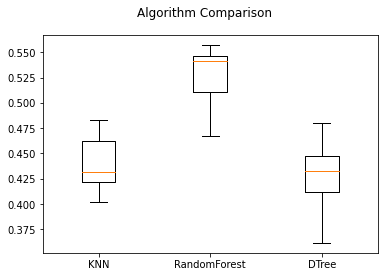

In [93]:
results, names = kFoldComp(X, y)

KNN: 0.494646 (0.059566)
RandomForest: 0.575354 (0.059294)
DTree: 0.475240 (0.044310)


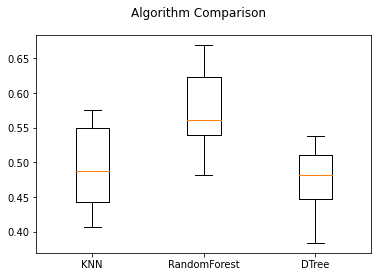

In [76]:
resultsRed, namesRed = kFoldComp(XRed, yRed)

KNN: 0.454885 (0.033524)
RandomForest: 0.526154 (0.045267)
DTree: 0.412430 (0.029067)


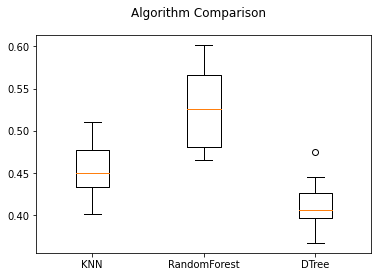

In [77]:
resultsWhite, namesWhite = kFoldComp(XWhite, yWhite)